# Red neuronal convolucional para detectar sonrisas 

## Introducción

### Pregunta de investigación y objectivos

*Pregunta de investigación:*  Como construir una CNN que pueda clasificar si una persona está sonriendo 

*Objetivo general:* Construir una CNN que pueda clasificar si una persona está sonriendo 

*Objetivos especificos*

* Encontrar alguna arquitectura de CNN que pueda clasificar si una persona está sonriendo

* Encontrar una base de datos en donde haya imagenes de personas que esten clasificadas en base a si están spnriendo o no lo están 

* Programar en Python la CNN y entrenarla con la base de datos previamente mencionada 

* Concluir que tan eficiente fue nuetra CNN en la tarea de clasificar si una persona está sonriendo

Durante el tiempo de desarrollo para el trabajo final hemos alcanzado todo los objetivos propuestos. Hemos investigado y encontrado una arquitectura de CNN que cumple satisfactoriamente la tarea de clasificar si una persona está sonriendo o no. También hemos podido encontrar una base de datos (CelebA dataset) donde pudimos extraer los suficientes datos correctamente clasificados y ordenandos para el entrenamiento de la CNN y hemos podido programar satisfactoriamente la CNN utilizando librerías de Python tales como Numpy, pandas, matplotlib y pytorch en donde hemos conclido  buenos resultados en el performace de la CNN en train y en test detallados mas precisamente en el desarrollo del notebook.

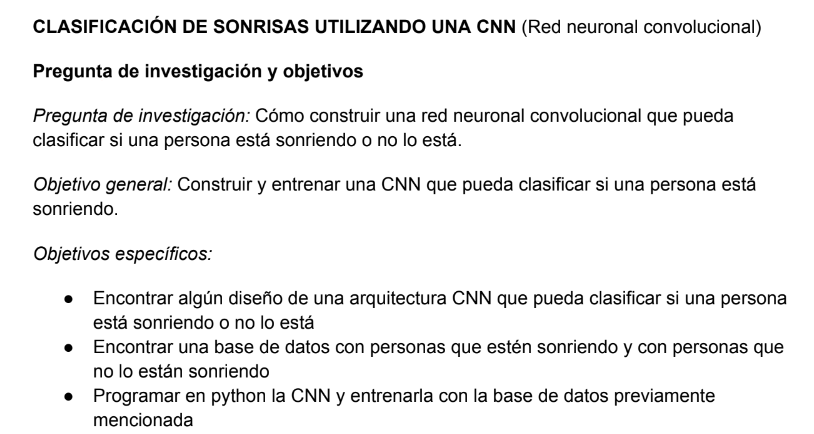

## Analisis Exploratorio de los datos mostrando las transformaciones

En nuestro trabajo final vamos a implementar una CNN para clasificar si una persona está sonriendo en una imagen utilizando 
[CelebA dataset](https://www.kaggle.com/datasets/jessicali9530/celeba-dataset) como nuestra base de datos para el entrenamiento y testeo de la CNN


CelebA dataset es una base de datos popular en el area de la visión artificial por computadora y el aprendizaje profundo  en torno a la identificación de rostros para varias aplicaciones, desde iniciar sesión en su teléfono con su rostro o buscar imágenes de vigilancia para un sospechoso en particular. Este conjunto de datos es excelente para entrenar y probar modelos para la detección de rostros, particularmente para reconocer atributos faciales, como encontrar personas con cabello castaño, sonriendo o usando anteojos. Las imágenes cubren grandes variaciones de poses, desorden de fondo, personas diversas, respaldadas por una gran cantidad de imágenes y ricas anotaciones. Estos datos fueron recopilados originalmente por investigadores de MMLAB, la Universidad China de Hong Kong 

Importemos el dataset y particinemos los datos en train, validasion y test


In [1]:
import torchvision

image_path = './'
celeba_train_dataset = torchvision.datasets.CelebA(
    image_path, split='train',
    target_type='attr', download=False
)

celeba_valid_dataset = torchvision.datasets.CelebA(
    image_path, split='valid',
    target_type='attr', download=False
)

celeba_test_dataset = torchvision.datasets.CelebA(
    image_path, split='test',
    target_type='attr', download=False
)


print('Train set', len(celeba_train_dataset))
print('Validation set', len(celeba_valid_dataset))
print('test set', len(celeba_test_dataset))

Train set 162770
Validation set 19867
test set 19962


En Celeba dataset hay 202,599 imagenes de personas famosas cada una  clasificada con atributos binarios

In [8]:
import pandas as pd

ruta = r'C:\Users\Acer\Documents\Plantillas personalizadas de Office\a\celeba\list_attr_celeba.txt'
df = pd.read_csv(ruta)
df.head()

,202599
0,5_o_Clock_Shadow Arched_Eyebrows Attractive Ba...
1,000001.jpg -1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 1...
2,000002.jpg -1 -1 -1 1 -1 -1 -1 1 -1 -1 -1 1...
3,000003.jpg -1 -1 -1 -1 -1 -1 1 -1 -1 -1 1 -1...
4,000004.jpg -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1...


Cada imagen tiene una dimensión de 178x218 pixeles y 40 atributos binarios 

In [6]:
celeba_train_dataset[0]

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218>,
 tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
         1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))

Antes de entrenar la CNN con los datos, una buena idea es procesar los datos de train con trasformaciones como por ejemplo girar la imagen, re escalarla  o ajustar el contraste, esto con el fin de minimizar lo mas posible el sesgo que podría obtener la CNN
al entrenarla con nuestras datos de train.

Especifimanete las transformaciones que vamos a implementar en nuestro conjunto de train van a ser recortar (`transforms.RandomCrop`) y posteriormente girar (` transforms.RandomHorizontalFlip`)
 Hagamos una visualización en el siguiente código 

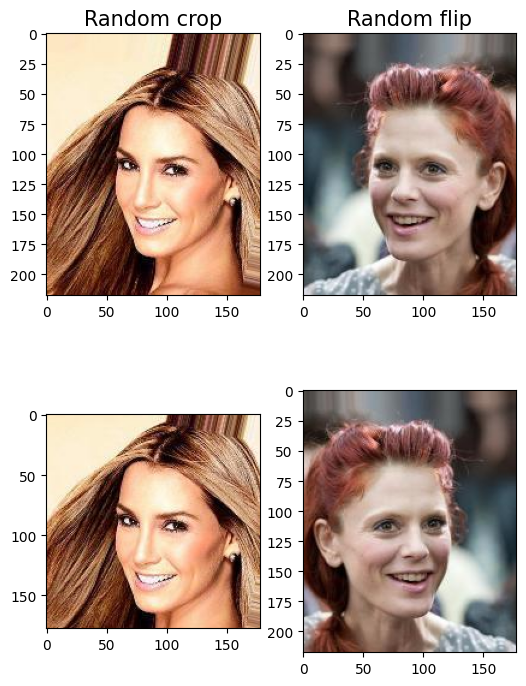

In [9]:
import matplotlib.pyplot as plt
from torchvision import transforms
import torch

torch.manual_seed(1)

fig = plt.figure(figsize=(16, 8.5))

# Cortar (crop)
ax = fig.add_subplot(2, 5, 1)
img, attr = celeba_train_dataset[0]
ax.set_title('Random crop', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 6)
img_transform = transforms.Compose([transforms.RandomCrop([178, 178])])
img_cropped =  img_transform(img)
ax.imshow(img_cropped)


# girar (flip)
ax = fig.add_subplot(2, 5, 2)
img, attr = celeba_train_dataset[1]
ax.set_title('Random flip', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 7)
img_transform = transforms.Compose([transforms.RandomHorizontalFlip()])
img_flipped = img_transform(img)
ax.imshow(img_flipped)

Donde la idea es aplicar a todo el conjunto train primero la trasformación cortar (crop) y luego la trasformación girar (flip), Donde posteiormente se re escalarán las imagenes a una dimensión de 64x64 con la trasformación `transforms.Resize([64, 64])`, es decir

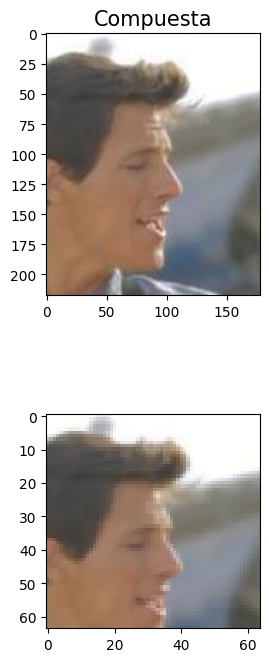

In [10]:
fig = plt.figure(figsize=(16, 8.5))

ax = fig.add_subplot(2, 5, 1)
img, attr = celeba_train_dataset[2]
ax.set_title('Compuesta', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 6)
img_transform = transforms.Compose([transforms.RandomCrop([178, 178]), transforms.RandomHorizontalFlip(), transforms.Resize([64, 64])])
img_compose =  img_transform(img)
ax.imshow(img_compose)

Donde finalmente se tensorizarán con el método  `transforms.ToTensor()` para poder ser procesada por la CNN

In [ ]:
"""
Cosas que faltan

* Demostrar que celabdaset noy ha atrivutos faltates y 
que efectivamente es una base de datos muy buena

* corregir el df de pandas


"""

## Descripcion General del Modelo

Definición del Modelo (FaceModel): Define una CNN con cuatro bloques convolucionales y una capa totalmente conectada. Cada bloque convolucional tiene una capa convolucional, una capa de activación ReLU, una capa de max pooling y algunas de ellas tienen una capa de dropout para evitar el sobreajuste.

Entrenamiento del Modelo (ModelTrainer): Se encarga de entrenar el modelo. Para cada época, se entrena el modelo con los datos de entrenamiento y luego se valida con los datos de validación. Durante el entrenamiento, el modelo hace una predicción, calcula la pérdida (la diferencia entre la predicción y el valor real), luego realiza backpropagation para calcular los gradientes, y finalmente actualiza los parámetros del modelo. Durante la validación, el modelo simplemente hace predicciones y calcula la pérdida, sin realizar backpropagation ni actualizar parámetros.

Preparación de los datos: Aquí el código carga el conjunto de datos CelebA, aplica varias transformaciones para ajustar las imágenes al formato requerido por el modelo (recortar, cambiar tamaño, normalizar) y divide los datos en conjuntos de entrenamiento, validación y prueba. Se utiliza un cargador de datos (DataLoader) para proporcionar los datos en lotes.

Entrenamiento y validación del modelo: Aquí el código crea el modelo, la función de pérdida (binary cross entropy), el optimizador (Adam), y entrena el modelo por un número específico de épocas. Durante cada época, muestra las métricas de pérdida y precisión para los conjuntos de entrenamiento y validación.

Prueba del modelo: Aquí el código prueba el modelo con los datos de prueba y muestra la precisión obtenida.

Visualización de los resultados: Finalmente, el código genera gráficos de las historias de pérdida y precisión durante las épocas de entrenamiento y validación.

## Arquitectura


La arquitectura de la red neuronal en cuestión es la siguiente:

Capa convolucional: Número de canales de entrada: 3 (correspondiente a las tres componentes de color de la imagen RGB). Número de canales de salida: 32. Tamaño del kernel: 3x3. Padding: 1 (para mantener el tamaño de la entrada). Función de activación: ReLU. Capa de Max Pooling: reduce la resolución espacial a la mitad mediante un kernel de 2x2. Capa de Dropout: con una probabilidad de 0.5, desactiva aleatoriamente las salidas para evitar el sobreajuste.

Capa convolucional: Número de canales de entrada: 32. Número de canales de salida: 64. Tamaño del kernel: 3x3. Padding: 1. Función de activación: ReLU. Capa de Max Pooling.

Capa convolucional: Número de canales de entrada: 64. Número de canales de salida: 128. Tamaño del kernel: 3x3. Padding: 1. Función de activación: ReLU. Capa de Max Pooling.

Capa convolucional: Número de canales de entrada: 128. Número de canales de salida: 256. Tamaño del kernel: 3x3. Padding: 1. Función de activación: ReLU. Capa de Avg Pooling: reduce la resolución espacial a 1x1 mediante un kernel de 8x8.

Capa de aplanamiento: transforma los datos de entrada en un vector unidimensional.

Capa completamente conectada (fully connected): Número de neuronas de entrada: 256. Número de neuronas de salida: 1. Función de activación: ninguna.

Capa de activación: Sigmoid. Se utiliza para obtener una salida en el rango [0, 1], que representa la probabilidad de que la imagen contenga una sonrisa.

En resumen, la red consta de cuatro bloques convolucionales con capas de activación ReLU y capas de reducción de tamaño (Max Pooling y Avg Pooling). Después de los bloques convolucionales, se encuentra una capa de aplanamiento que transforma los datos en un vector unidimensional, seguida de una capa completamente conectada sin función de activación. Finalmente, se aplica una función de activación Sigmoid para obtener la salida final de la red.

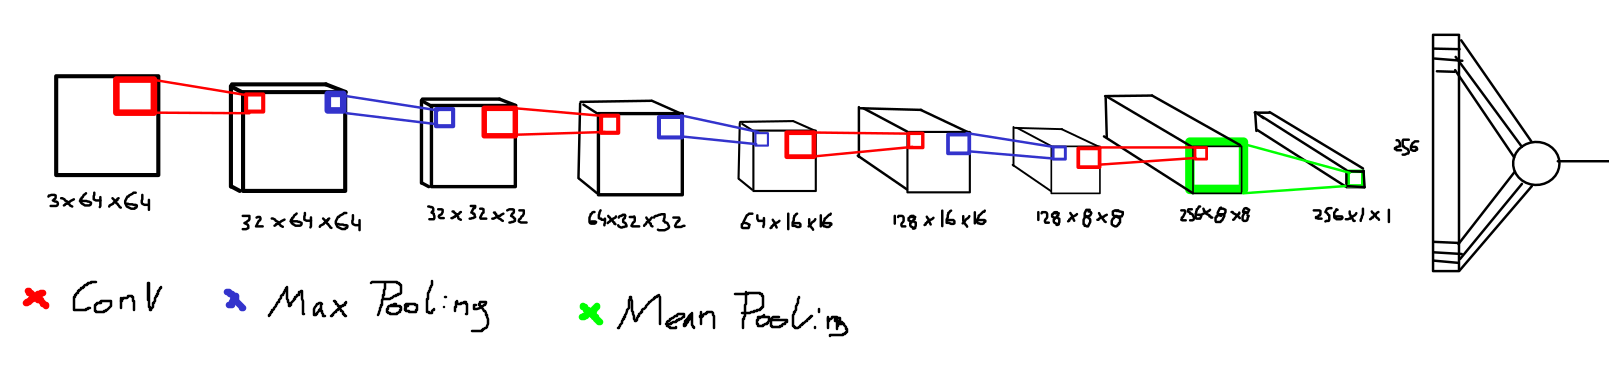

## Implementación

In [43]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np

# Definición de la arquitectura del modelo
class FaceModel(nn.Module):
    def __init__(self):
        super(FaceModel, self).__init__()

        # Primer bloque convolucional
        # Incluye una capa convolucional, una capa de activación ReLU,
        # una capa de max pooling y una capa de dropout para prevenir el sobreajuste
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=0.5)
        )

        # Los siguientes bloques convolucionales son similares, incrementando los canales de salida
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=0.5)
        )

        self.conv_block3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.conv_block4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=8),
        )

        # Capa para aplanar los datos y capa completamente conectada
        # La capa Flatten convierte los tensores 2D de las convoluciones en tensores 1D para la capa completamente conectada
        # La capa completamente conectada (o densa) realiza la clasificación final
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(256, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Forward propagation a través de los bloques convolucionales y la capa completamente conectada
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.conv_block4(x)
        x = self.flatten(x)
        x = self.fc(x)
        return self.sigmoid(x)  # La función sigmoid se usa para obtener un valor de probabilidad

# Clase para entrenar el modelo
class ModelTrainer:
    def __init__(self, model, loss_fn, optimizer):
        # Se inicializa con el modelo a entrenar, la función de pérdida a usar y el optimizador a usar
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.loss_hist_train = []
        self.accuracy_hist_train = []
        self.loss_hist_valid = []
        self.accuracy_hist_valid = []

    def train(self, train_dl, valid_dl, num_epochs):
        # Bucle de entrenamiento
        # Por cada época, se entrena el modelo con los datos de entrenamiento y luego se valida con los datos de validación
        for epoch in range(num_epochs):
            self.model.train()  # Configura el modelo en modo de entrenamiento
            epoch_losses_train = []
            epoch_accuracies_train = []
            for x_batch, y_batch in train_dl:
                #x_batch = x_batch.cuda()
                #y_batch = y_batch.cuda()
                pred = self.model(x_batch)[:, 0]  # Predicciones del modelo
                loss = self.loss_fn(pred, y_batch.float())  # Calcula la pérdida
                loss.backward()  # Propagación hacia atrás para calcular los gradientes
                self.optimizer.step()  # Actualiza los parámetros del modelo
                self.optimizer.zero_grad()  # Limpia los gradientes para el siguiente lote
                epoch_losses_train.append(loss.item())
                is_correct = ((pred>=0.5).float() == y_batch).float()
                epoch_accuracies_train.append(is_correct.mean().item())
                x_batch, y_batch, pred = None, None, None
                #torch.cuda.empty_cache()  # Liberar memoria después de cada lote

            # Guarda las métricas de pérdida y precisión para el entrenamiento
            self.loss_hist_train.append(np.mean(epoch_losses_train))
            self.accuracy_hist_train.append(np.mean(epoch_accuracies_train))

            # Valida el modelo después de cada época de entrenamiento
            valid_loss, valid_accuracy = self.validate(valid_dl)
            self.loss_hist_valid.append(valid_loss)
            self.accuracy_hist_valid.append(valid_accuracy)
            print(f'Epoch {epoch+1} / {num_epochs}: Training Loss: {np.mean(epoch_losses_train):.4f}, Training Accuracy: {np.mean(epoch_accuracies_train):.4f}, Validation Loss: {valid_loss:.4f}, Validation Accuracy: {valid_accuracy:.4f}')

        return self.loss_hist_train, self.accuracy_hist_train, self.loss_hist_valid, self.accuracy_hist_valid  # Agrega esta línea al final de la función

    def validate(self, valid_dl):
        # Valida el modelo con los datos de validación
        # Esto implica calcular las predicciones del modelo y compararlas con las etiquetas reales
        self.model.eval()  # Configura el modelo en modo de evaluación
        epoch_losses_valid = []
        epoch_accuracies_valid = []
        with torch.no_grad():  # No se necesitan gradientes para la validación, por lo que se desactivan para ahorrar memoria
            for x_batch, y_batch in valid_dl:
                #x_batch = x_batch.cuda()
                #y_batch = y_batch.cuda()
                pred = self.model(x_batch)[:, 0]
                loss = self.loss_fn(pred, y_batch.float())
                epoch_losses_valid.append(loss.item())
                is_correct = ((pred>=0.5).float() == y_batch).float()
                epoch_accuracies_valid.append(is_correct.mean().item())
        return np.mean(epoch_losses_valid), np.mean(epoch_accuracies_valid)

    def infer(self, test_dl):
        # Inferencia en el conjunto de prueba
        self.model.eval()  # Configura el modelo en modo de evaluación
        test_accuracies = []
        with torch.no_grad():
            for x_batch, y_batch in test_dl:
                #x_batch = x_batch.cuda()
                #y_batch = y_batch.cuda()
                pred = self.model(x_batch)[:, 0]
                is_correct = ((pred>=0.5).float() == y_batch).float()
                test_accuracies.append(is_correct.mean().item())
        return np.mean(test_accuracies)

# Función para extraer la etiqueta 'smiling' del conjunto de datos CelebA
def get_smile(attr):
    # Esta función es una transformación personalizada para el conjunto de datos CelebA
    # Devuelve si la celebridad en la imagen está sonriendo o no
    return attr[31]


# Definición del path a los datos 
image_path = './'

# Transformaciones para el conjunto de entrenamiento
transform_train = transforms.Compose([
    transforms.RandomCrop([178, 178]),  # Recorta aleatoriamente una región de la imagen
    transforms.RandomHorizontalFlip(),  # Aplica un volteo horizontal aleatorio
    transforms.Resize([64, 64]),  # Cambia el tamaño de la imagen a 64x64
    transforms.ToTensor(),  # Convierte la imagen en un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normaliza las imágenes
])

# Transformaciones para los conjuntos de validación y prueba
transform = transforms.Compose([
    transforms.CenterCrop([178, 178]),  # Recorta el centro de la imagen
    transforms.Resize([64, 64]),  # Cambia el tamaño de la imagen a 64x64
    transforms.ToTensor(),  # Convierte la imagen en un tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normaliza las imágenes
])

# Creación de los conjuntos de datos
celeba_train_dataset = torchvision.datasets.CelebA(
    image_path, split='train',
    target_type='attr', download=False,
    transform=transform_train, target_transform=get_smile
)

celeba_valid_dataset = torchvision.datasets.CelebA(
    image_path, split='valid',
    target_type='attr', download=False,
    transform=transform, target_transform=get_smile
)

celeba_test_dataset = torchvision.datasets.CelebA(
    image_path, split='test',
    target_type='attr', download=False,
    transform=transform, target_transform=get_smile
)

# Subconjunto de los conjuntos de datos para el entrenamiento y validación
celeba_train_dataset = Subset(celeba_train_dataset, torch.arange(64000))
celeba_valid_dataset = Subset(celeba_valid_dataset, torch.arange(6400))

# Definición del tamaño del lote y la semilla para la reproducibilidad
batch_size = 32
torch.manual_seed(1)

# Creación de los cargadores de datos
train_dl = DataLoader(celeba_train_dataset, batch_size=batch_size, shuffle=True)
valid_dl = DataLoader(celeba_valid_dataset, batch_size=batch_size, shuffle=False)
test_dl = DataLoader(celeba_test_dataset, batch_size=batch_size, shuffle=False)

Epoch 1 / 15: Training Loss: 0.6303, Training Accuracy: 0.6363, Validation Loss: 0.4835, Validation Accuracy: 0.7673
Epoch 2 / 15: Training Loss: 0.3850, Training Accuracy: 0.8306, Validation Loss: 0.2656, Validation Accuracy: 0.8962
Epoch 3 / 15: Training Loss: 0.2907, Training Accuracy: 0.8780, Validation Loss: 0.2244, Validation Accuracy: 0.9095
Epoch 4 / 15: Training Loss: 0.2655, Training Accuracy: 0.8888, Validation Loss: 0.2180, Validation Accuracy: 0.9122
Epoch 5 / 15: Training Loss: 0.2542, Training Accuracy: 0.8929, Validation Loss: 0.2152, Validation Accuracy: 0.9103
Epoch 6 / 15: Training Loss: 0.2460, Training Accuracy: 0.8975, Validation Loss: 0.1943, Validation Accuracy: 0.9197
Epoch 7 / 15: Training Loss: 0.2387, Training Accuracy: 0.8998, Validation Loss: 0.2079, Validation Accuracy: 0.9150
Epoch 8 / 15: Training Loss: 0.2355, Training Accuracy: 0.9016, Validation Loss: 0.1997, Validation Accuracy: 0.9164
Epoch 9 / 15: Training Loss: 0.2302, Training Accuracy: 0.9023, 

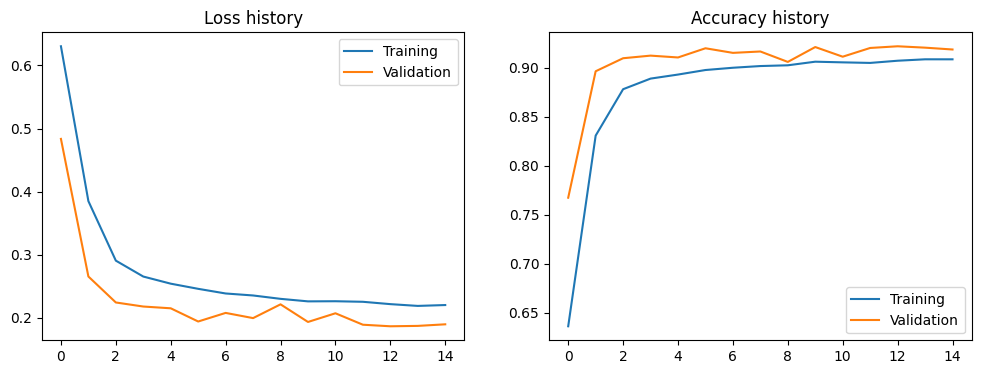

In [44]:
# Creación del modelo, la función de pérdida y el optimizador
model = FaceModel()
#model = model.cuda() # Modelo en GPU

loss_fn = nn.BCELoss()  # Función de pérdida de entropía cruzada binaria
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizador Adam con una tasa de aprendizaje de 0.01

# Creación del entrenador del modelo
trainer = ModelTrainer(model, loss_fn, optimizer)

# Definición del número de épocas
num_epochs = 15

# Entrenamiento del modelo y visualización de las métricas de entrenamiento
loss_hist_train, accuracy_hist_train, loss_hist_valid, accuracy_hist_valid = trainer.train(train_dl, valid_dl, num_epochs)

# Prueba del modelo y visualización de la métrica de precisión
test_accuracy = trainer.infer(test_dl)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Trama de la historia de la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_hist_train, label='Training')
plt.plot(loss_hist_valid, label='Validation')
plt.legend()
plt.title('Loss history')

# Trama de la historia de la precisión de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(accuracy_hist_train, label='Training')
plt.plot(accuracy_hist_valid, label='Validation')
plt.legend()
plt.title('Accuracy history')

plt.show()

In [45]:
torch.save(model.state_dict(), 'model_weights_20.pth')

## Inferencia

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import transforms
import torchvision
import torch.nn as nn
from PIL import Image
from torchvision import transforms
import torch
import numpy as np

class FaceModel(nn.Module):
    def __init__(self):
        super(FaceModel, self).__init__()

        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=0.5)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=0.5)
        )

        self.conv_block3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.conv_block4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=8),
        )

        self.flatten = nn.Flatten()
        self.fc = nn.Linear(256, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.conv_block4(x)
        x = self.flatten(x)
        x = self.fc(x)
        return self.sigmoid(x)

model = FaceModel()
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

# Transformaciones para el preprocesamiento de la imagen
transform = transforms.Compose([
    transforms.CenterCrop([178, 178]),
    transforms.Resize([64, 64]),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



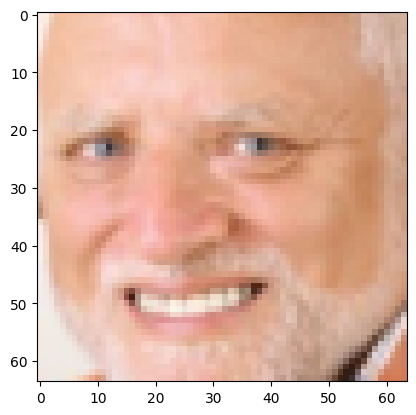

La probabilidad de que esté sonriendo es: 0.9586338400840759


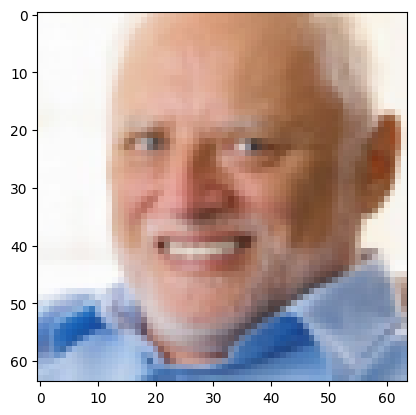

La probabilidad de que esté sonriendo es: 0.9482237100601196


In [55]:
# Carga de la imagen que debe estar en el mismo directorio donde se encuentra
# el este archivo
def infere(image_path):
    image = Image.open(image_path)

    # Preprocesamiento y agregado de una dimensión extra
    processed_image = transform(image).unsqueeze(0)
    
    # Desnormalización y visualización de la imagen
    image_to_show = processed_image[0].numpy().transpose((1, 2, 0))
    image_to_show = image_to_show * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image_to_show = image_to_show.clip(0, 1)

    plt.imshow(image_to_show)
    plt.show()

    # Haciendo inferencia
    output = model(processed_image)

    print("La probabilidad de que esté sonriendo es:", output.item())


image_path1 = "./hide-pain-harold.jpg"
image_path2 = "./hide-pain-harold2.jpg"

infere(image_path1)
infere(image_path2)

## Conclusiones

General somos optimistas en los resultados obtenidos, pues aunque estamos usando un modelo relativamente simple si analizamos las gráficas obtenidas concluimos en cada parte que:

Pérdida de entrenamiento: La disminución constante en la pérdida de entrenamiento a lo largo de las épocas indica que el modelo está aprendiendo adecuadamente de los datos de entrenamiento. Esto es un indicativo positivo de que el modelo está identificando y aprendiendo patrones relevantes.

Pérdida con los datos de validación: La pérdida de validación muestra una tendencia decreciente con algunas fluctuaciones, lo cual es una buena señal de que el modelo puede generalizar bien a datos no vistos durante el entrenamiento. No hay evidencia de un sobreajuste significativo, ya que no hay un patrón de aumento constante en la pérdida de validación.


Precisión con los datos de entrenamiento: La precisión de entrenamiento también ha aumentado consistentemente, lo cual es una señal de que el modelo está mejorando en su capacidad de hacer predicciones correctas en los datos de entrenamiento.

Precisión con los datos de validación: La precisión de validación aumenta en general, aunque con algunas fluctuaciones. Esto sugiere que el rendimiento del modelo en los datos de validación mejora a lo largo del tiempo. Es interesante notar que la precisión de validación a menudo supera la precisión de entrenamiento, lo cual podría deberse a una fuerte regularización durante el entrenamiento o a que los datos de validación son "más fáciles" para el modelo.

Precisión con los datos de prueba: El hecho de que la precisión de prueba sea muy similar a la precisión de validación en la última época es una señal positiva. Esto sugiere que el modelo ha generalizado bien y no se ha sobreajustado a los datos de entrenamiento.


## Ejecución del plan 

Dejando de lado en análisis de los resultados, al realizar este tipo de proyectos que implican el uso de diferentes servicios de computación en la nube y análisis de datos externos, nos permite tomar conciencia de los grandes beneficios que esto nos trae, ya que simplifican mucho el aprendizaje y desarrollo de prototipos, sin embargo, las carácteristicas propias de estos servicios nos enseñaron por experiencia, sobre todo cuando estamos recibiendo un servicio gratuido, que este puede ser interrumpido en cualquier momento, por ejemplo, las siguientes imagenes son prueba de ello



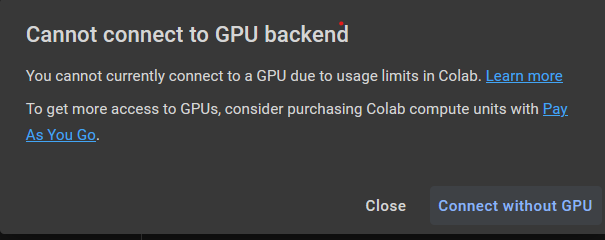

También tuvimos problemas al intentar descargar los datos de CelebA, ya que en ocasiones los archivos se vuelven innacesibles debido a que hay picos en su consumo, y los propietarios de los datos lo tienen alojado en un sitio que tienen muchas limitaciones. https://github.com/pytorch/vision/issues/1920

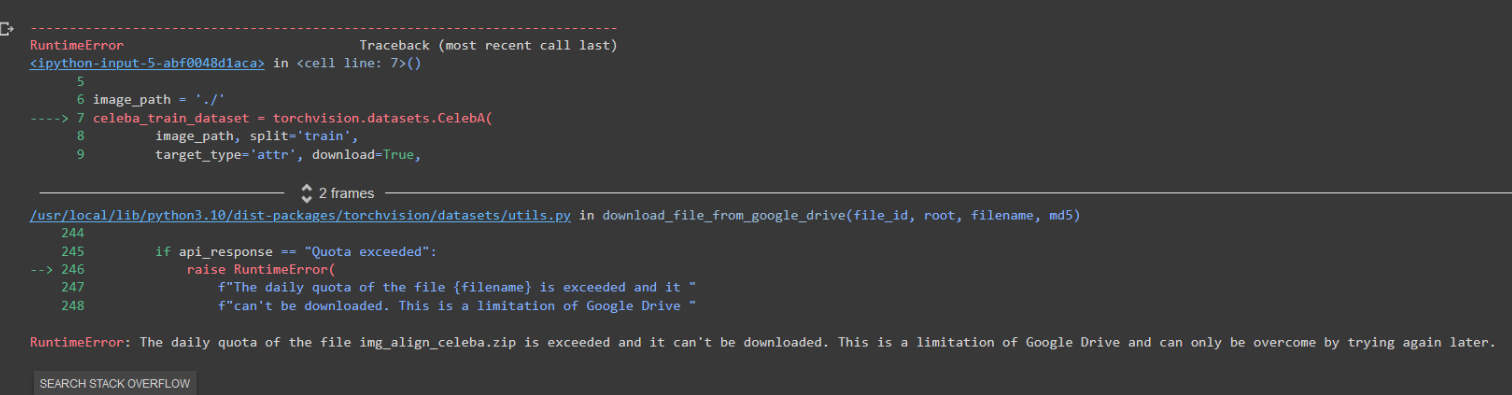

Estos dos factores inesperados alteraron considerablemente los planes que habíamos elaborado. Con un poder computacional limitado y acceso a datos restringidos, nos vimos condicionados en los modelos que podíamos entrenar. Por ello, optamos por usar una arquitectura más simple, lo cual nos generaba cierta preocupación. Temíamos que quizás no fuera lo suficientemente compleja como para aprender de los datos las características que le permitieran realizar inferencias de calidad, comparables a las que generan las arquitecturas más comunes citadas en la literatura. Sin embargo, logramos superar dichos inconvenientes al encontrar un libro que presentaba la arquitectura que finalmente decidimos implementar, y que nos proporcionó buenos resultados. En otras palabras, los supuestos de contar con suficiente poder computacional y de poder utilizar una de las arquitecturas más comunes no se materializaron. Subestimamos las dificultades que podríamos enfrentar en este aspecto y nos vimos obligados a realizar un esfuerzo adicional para el cual no contábamos con mucho margen de maniobra.

En cuanto al trabajo futuro, nos gustaría aplicar el modelo Inception e implementar el uso de transformers para este tipo de problemas de reconocer uno o mas atributos binarios en una misma imagen. Este era nuestro objetivo "nice to have" si llegáramos al final con algo de tiempo sobrante. Sin embargo, debido a las circunstancias ya descritas, no pudimos alcanzarlo. Por tanto, consideramos que sería muy interesante explorar estas posibilidades en un trabajo futuro.

### Diagrama Gantt

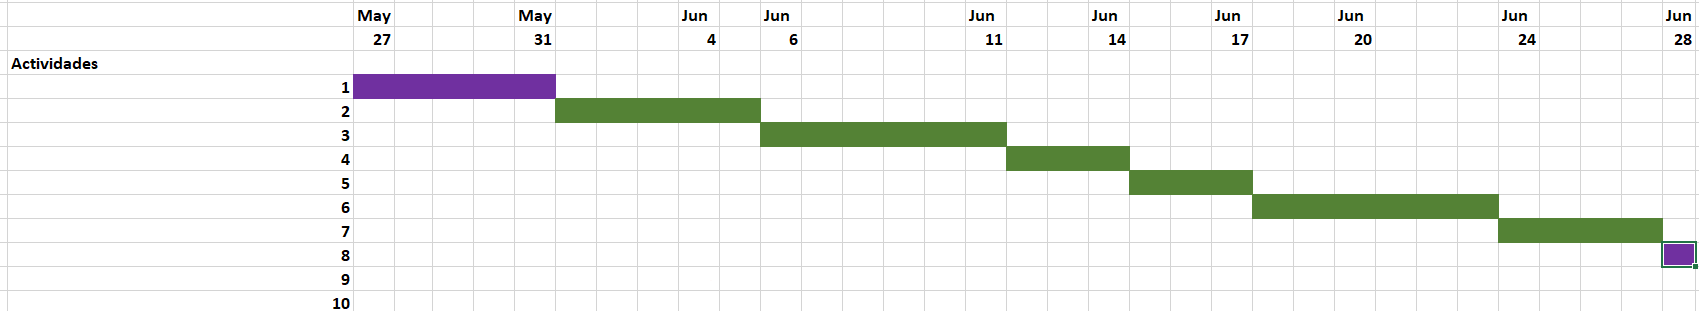

* 1 (8 horas) Fin de desarrollo del entorno del agente para el proyecto de aprendizaje por refuerzo. Cambio de planes para un nuevo proyecto

* 2  (6 horas)  Discusión de un nuevo plan para el desarrollo de el nuevo proyecto de CNN

* 3 (6 horas) Estudio de el tema de redes neuronales y de Pytorch

* 4 (6 horas) Estudio del tema redes neuronales convolucionales

* 5 (8 horas) Investigación de bibliografia y ejemplos de CNN, y empezar el desallo de el proyecto final

* 6 (12 horas) Desarrollo del proyecto, pruebas experimentos y discusión de ideas y asesorías con el profesor e inicio de redacción análisis y conclusiones  

* 7 (6 horas) Finalización de la etapa de desarrollo del proyecto, análisis de resultados conclusiones preparación de la exposición y redacción del proyecto en jupyternotebook

* 8 (2 horas) Entrega del proyecto y exposición 



## Implicaciones Éticas

Los productos de mayor complejidad que posibilitan el reconocimiento facial ya se están implementando, tanto por parte de los gobiernos para ejercer control sobre sus ciudadanos, como por las empresas para garantizar la seguridad de sus instalaciones. Sin embargo, existen implicaciones éticas a considerar.

- Privacidad: El reconocimiento facial tiene la potencialidad de rastrear y monitorear a los individuos sin su consentimiento, invadiendo su privacidad.

- Consentimiento: En numerosas ocasiones, las personas desconocen que su imagen está siendo capturada y utilizada por un sistema de reconocimiento facial, sin que se les solicite su consentimiento previo. Esto plantea cuestiones relativas al derecho a la autorización informada.

- Falsas identificaciones: Los sistemas de reconocimiento facial no son infalibles y pueden cometer errores en la identificación de personas. Estos errores pueden tener graves repercusiones, como acusaciones injustas o persecuciones indebidas.

- Sesgo algorítmico: Estos sistemas pueden albergar sesgos implícitos, dependiendo de cómo fueron entrenados. Por ejemplo, podrían presentar una tasa de error más alta al identificar personas de determinadas razas o géneros, lo que podría conducir a situaciones de discriminación.

- Uso inapropiado de la información: Si la información recopilada por estos sistemas cae en las manos equivocadas, puede ser empleada con fines malintencionados, como acoso, robo de identidad, o suplantación.

- Comercialización de datos: Las empresas pueden usar estos sistemas para recolectar datos faciales y venderlos a terceros con fines de marketing, lo que puede ser interpretado como una explotación de la identidad personal.

- Automatización del reconocimiento: El reconocimiento facial automatizado puede deshumanizar las interacciones sociales y normalizar el seguimiento y la vigilancia constante.
    
- Impacto en una sociedad libre: El uso generalizado del reconocimiento facial puede conducir a un estado de vigilancia constante, lo que puede restringir la libertad de expresión y de asociación, debido al temor a ser constantemente vigilado.

## Áspectos Legales y Comerciales

Los sistemas que permiten reconocer ciertas características en el rostro de las personas poseen diversas posibilidades de comercialización. Por citar un ejemplo, en las tiendas se pueden instalar cámaras que clasifiquen las reacciones de los clientes ante productos, precios, descuentos, etc., y así obtener información valiosa para las empresas. Los productos más sofisticados, que facilitan el reconocimiento facial, ya están en uso tanto por parte de gobiernos para ejercer control sobre sus ciudadanos, como por empresas para garantizar la seguridad de sus instalaciones.